### Donors - Time Series Decomposition

**This section focuses on time series decomposition of the donor data, linear regression models, and visuals of various scaled features over time**





 

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
donors = pd.read_csv(r"C:\Users\ibaca\DonorByMonth.csv")

In [9]:
#Loading donor Data
donors.head()

Date  Donors  AvgTemp      CPI   Budget    Sales  \
0  1/1/2019   34698     35.9  251.712  1292132  1557361   
1  2/1/2019   27533     39.9  252.776  1271468  1432247   
2  3/1/2019   36468     50.2  254.202  1421717  1667795   
3  4/1/2019   32788     57.4  255.548  1348579  1530041   
4  5/1/2019   39674     61.6  256.092  1336206  1589136   

  NewResidentialConstruction(Thousands)  HousingUnitPermits(Thousands)  \
0                                 1,261                           87.0   
1                                 1,287                           80.0   
2                                 1,305                           98.2   
3                                 1,311                          116.6   
4                                 1,347                          118.1   

   HousingUnits  Adjusted Sales  AverageContrusctionHoursWorked  \
0         87000         1557361                            39.7   
1         80000         1432247                            38.6   
2         98200         1667795                            39.3   
3        116600         1530041                            39.0   
4        118100         1589136                            39.1   

   NewHomeSales(Thousands)  NewHomeSales  AdjustedDonors  
0                       49         49000           34698  
1                       57         57000           27533  
2                       68         68000           36468  
3                       64         64000           32788  
4                       56         56000           39674

In [10]:
#removing the comma in the dataset
donors['NewResidentialConstruction(Thousands)'] = donors['NewResidentialConstruction(Thousands)'].str.replace(',', '').astype(float)

In [11]:
print(donors.columns)

Index(['Date', 'Donors', 'AvgTemp', 'CPI', 'Budget', 'Sales',
       'NewResidentialConstruction(Thousands)',
       'HousingUnitPermits(Thousands)', 'HousingUnits', 'Adjusted Sales',
       'AverageContrusctionHoursWorked', 'NewHomeSales(Thousands)',
       'NewHomeSales', 'AdjustedDonors'],
      dtype='object')


In [12]:
donors['Date'] = pd.to_datetime(donors['Date'])
donors = donors.set_index('Date')


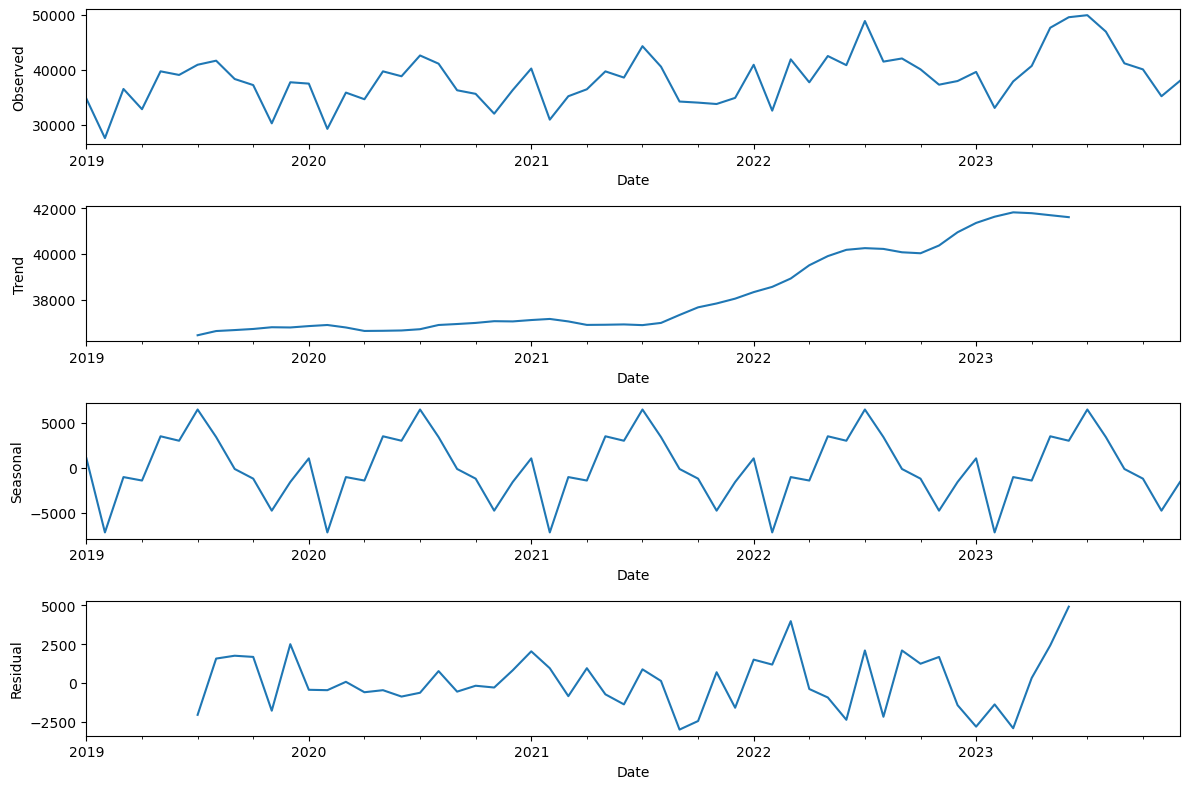

In [13]:
#Donor Decomposition
donor_decomp = seasonal_decompose(donors['AdjustedDonors'], model='Multiplicative', period=12)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
donor_decomp.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
donor_decomp.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
donor_decomp.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
donor_decomp.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

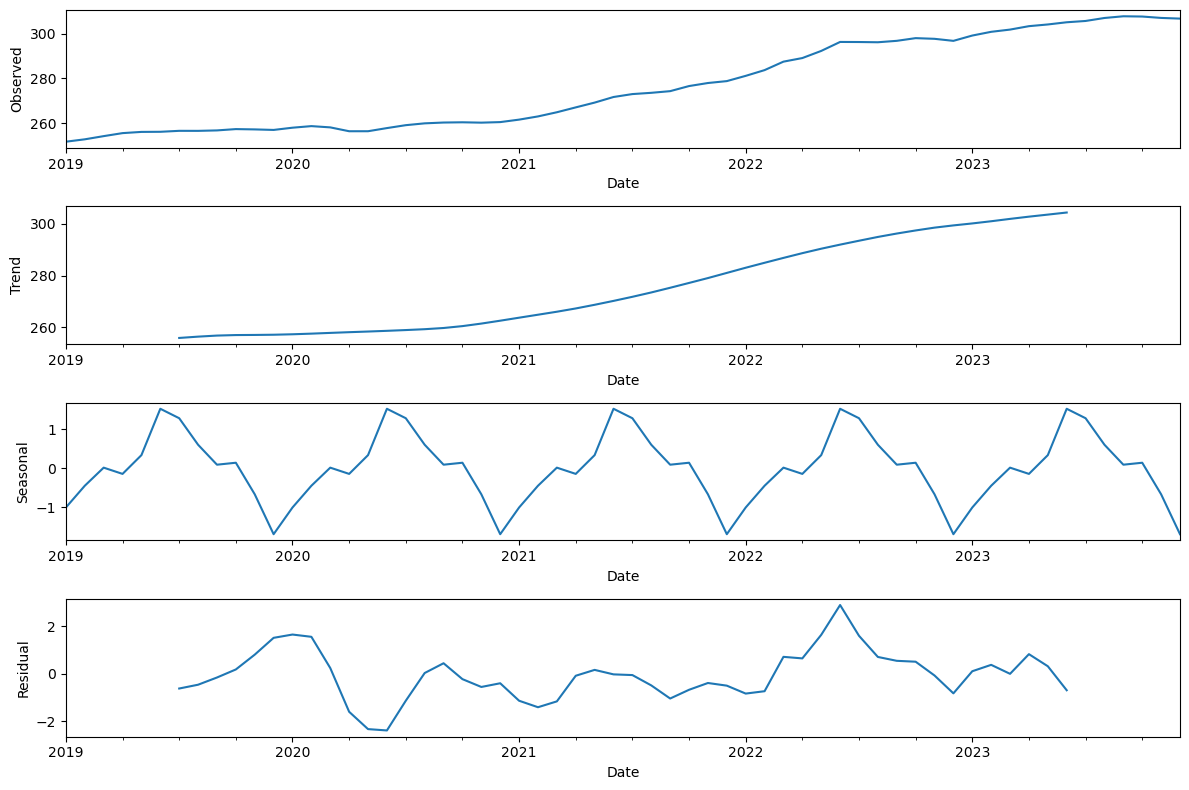

In [14]:
# Perform seasonal decomposition
donor_decomp = seasonal_decompose(donors['CPI'], model='Additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
donor_decomp.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
donor_decomp.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
donor_decomp.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
donor_decomp.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

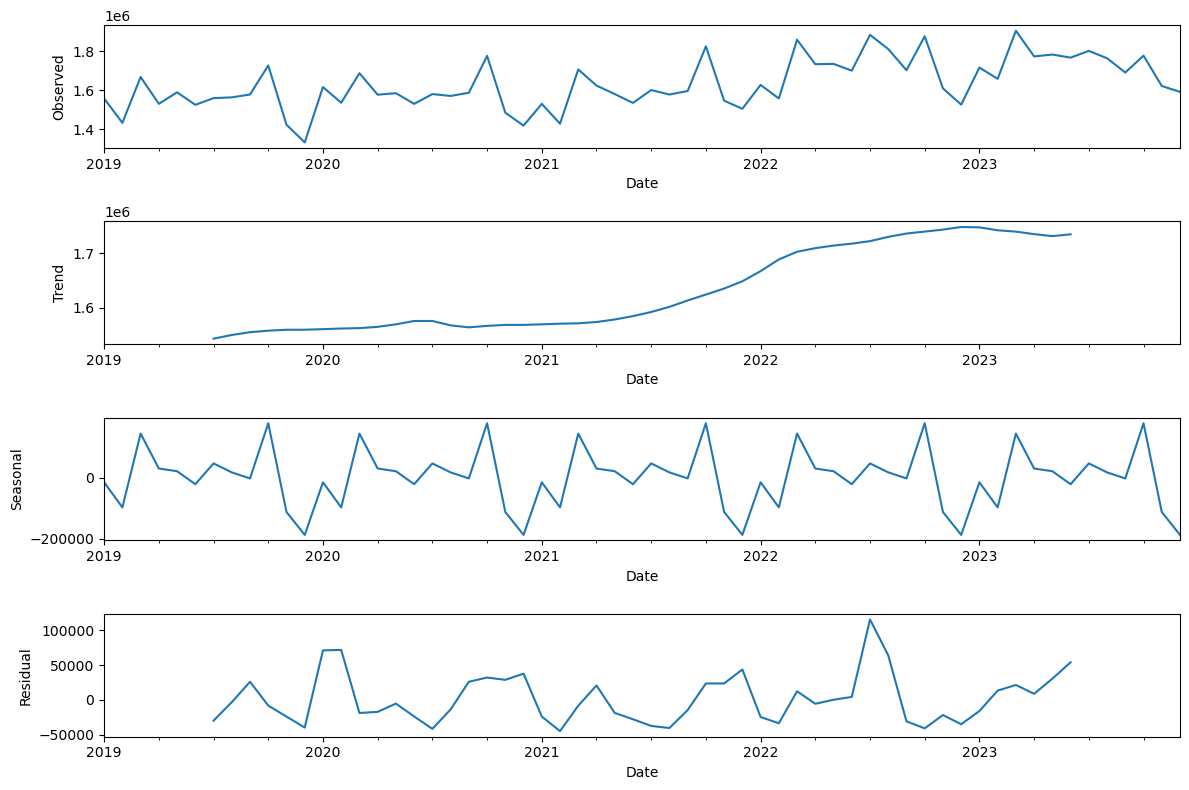

In [15]:

# Perform seasonal decomposition
donor_decomp = seasonal_decompose(donors['Adjusted Sales'], model='Multiplicative', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
donor_decomp.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
donor_decomp.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
donor_decomp.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
donor_decomp.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

C:\Users\ibaca\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


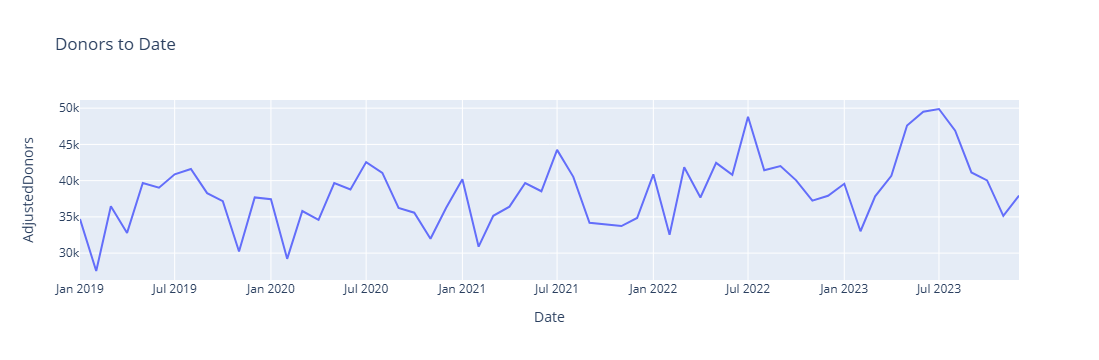

In [16]:
import plotly.express as px


# Create Plotly figure
fig = px.line(donors, y='AdjustedDonors', title='Donors to Date', labels={'Month-Year': 'Date', 'Donors': 'Number of Donors'})

# Show the plot
fig.show()

In [17]:
donors.head()

Donors  AvgTemp      CPI   Budget    Sales  \
Date                                                     
2019-01-01   34698     35.9  251.712  1292132  1557361   
2019-02-01   27533     39.9  252.776  1271468  1432247   
2019-03-01   36468     50.2  254.202  1421717  1667795   
2019-04-01   32788     57.4  255.548  1348579  1530041   
2019-05-01   39674     61.6  256.092  1336206  1589136   

            NewResidentialConstruction(Thousands)  \
Date                                                
2019-01-01                                 1261.0   
2019-02-01                                 1287.0   
2019-03-01                                 1305.0   
2019-04-01                                 1311.0   
2019-05-01                                 1347.0   

            HousingUnitPermits(Thousands)  HousingUnits  Adjusted Sales  \
Date                                                                      
2019-01-01                           87.0         87000         1557361   
2019-02-01                           80.0         80000         1432247   
2019-03-01                           98.2         98200         1667795   
2019-04-01                          116.6        116600         1530041   
2019-05-01                          118.1        118100         1589136   

            AverageContrusctionHoursWorked  NewHomeSales(Thousands)  \
Date                                                                  
2019-01-01                            39.7                       49   
2019-02-01                            38.6                       57   
2019-03-01                            39.3                       68   
2019-04-01                            39.0                       64   
2019-05-01                            39.1                       56   

            NewHomeSales  AdjustedDonors  
Date                                      
2019-01-01         49000           34698  
2019-02-01         57000           27533  
2019-03-01         68000           36468  
2019-04-01         64000           32788  
2019-05-01         56000           39674

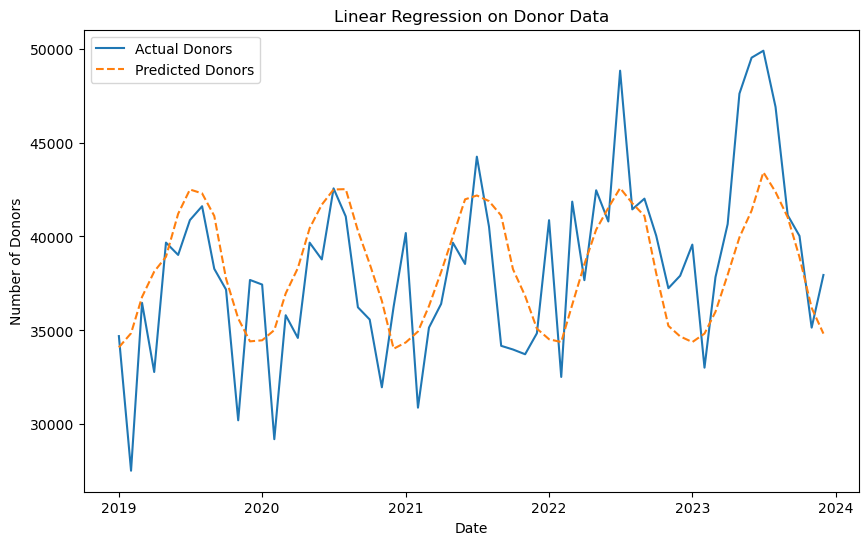

In [18]:

from sklearn.linear_model import LinearRegression

X = donors[['AvgTemp']]
y = donors['AdjustedDonors']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
donors['Predicted Donors'] = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(donors.index, donors['AdjustedDonors'], label='Actual Donors')
plt.plot(donors.index, donors['Predicted Donors'], label='Predicted Donors', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Donors')
plt.title('Linear Regression on Donor Data')
plt.legend()
plt.show()

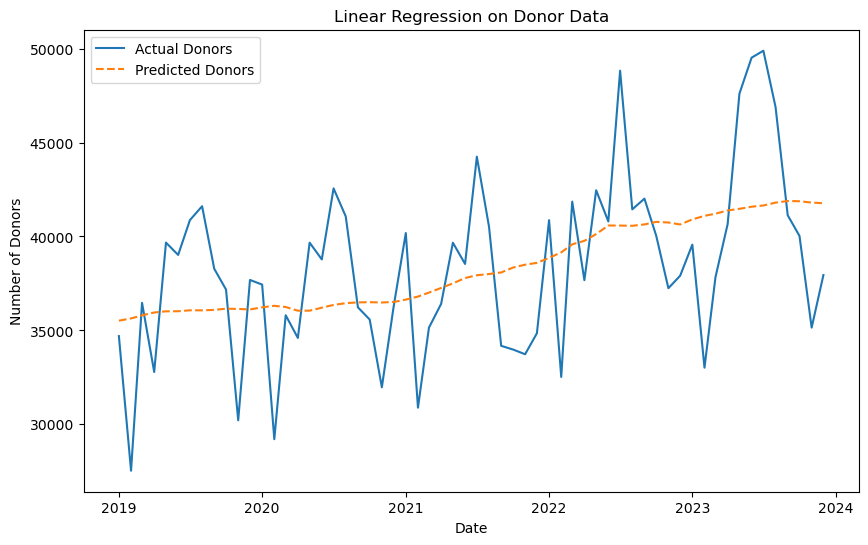

In [19]:
from sklearn.linear_model import LinearRegression

X = donors[['CPI']]
y = donors['AdjustedDonors']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
donors['Predicted Donors'] = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(donors.index, donors['AdjustedDonors'], label='Actual Donors')
plt.plot(donors.index, donors['Predicted Donors'], label='Predicted Donors', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Donors')
plt.title('Linear Regression on Donor Data')
plt.legend()
plt.show()

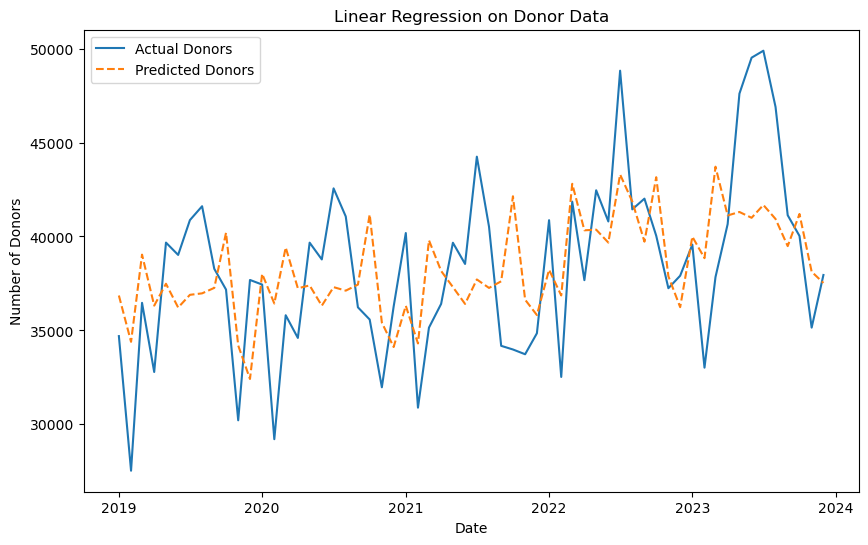

In [20]:
from sklearn.linear_model import LinearRegression

X = donors[['Adjusted Sales']]
y = donors['AdjustedDonors']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
donors['Predicted Donors'] = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(donors.index, donors['AdjustedDonors'], label='Actual Donors')
plt.plot(donors.index, donors['Predicted Donors'], label='Predicted Donors', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Donors')
plt.title('Linear Regression on Donor Data')
plt.legend()
plt.show()

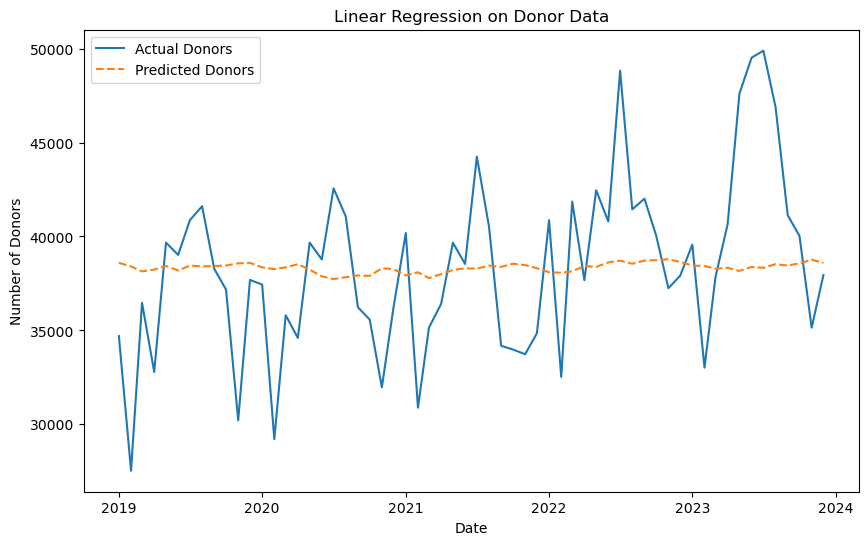

In [21]:
from sklearn.linear_model import LinearRegression

X = donors[['NewHomeSales']]
y = donors['AdjustedDonors']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
donors['Predicted Donors'] = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(donors.index, donors['AdjustedDonors'], label='Actual Donors')
plt.plot(donors.index, donors['Predicted Donors'], label='Predicted Donors', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Donors')
plt.title('Linear Regression on Donor Data')
plt.legend()
plt.show()

In [22]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

pipe = Pipeline([('quad_features', PolynomialFeatures(degree = 2, include_bias = True)), ('quad_model', LinearRegression())])
X1 = donors[['AvgTemp']]
y1 = donors['AdjustedDonors']
pipe.fit(X, y)
quad_pipe_mse = float(mean_squared_error(y, pipe.predict(X)))

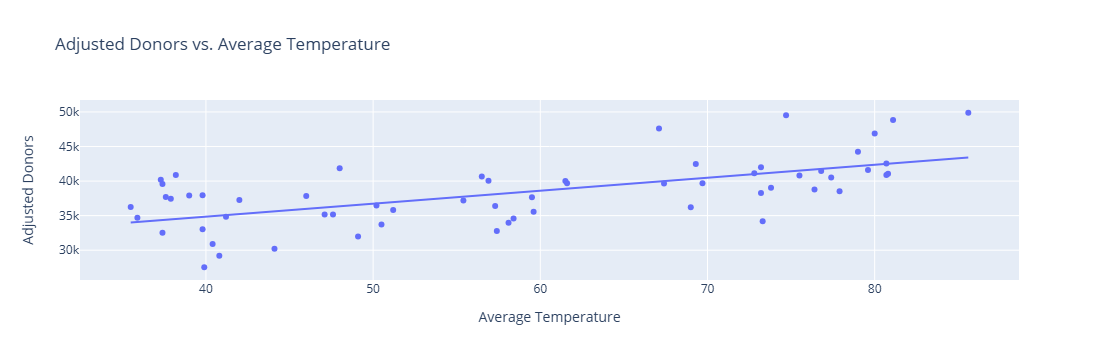

In [23]:
import plotly.express as px
fig = px.scatter(donors, x='AvgTemp', y='AdjustedDonors', trendline='ols', title='Adjusted Donors vs. Average Temperature')
fig.update_layout(xaxis_title='Average Temperature', yaxis_title='Adjusted Donors')
fig.show()

In [24]:
quad_reg = pipe.named_steps['quad_model']
coefs = quad_reg.coef_

In [25]:
print(type(quad_reg))
print(coefs)

<class 'sklearn.linear_model._base.LinearRegression'>
[ 0.00000000e+00 -3.49529280e-01  2.61312147e-06]


In [26]:
from sklearn.preprocessing import StandardScaler




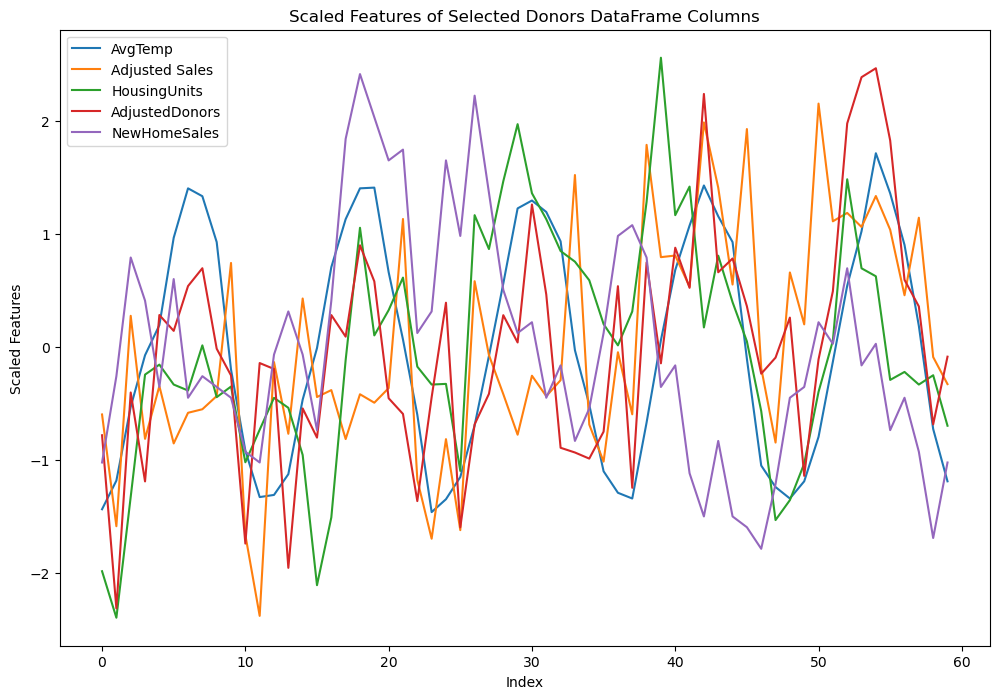

In [27]:
columns_to_plot = ['AvgTemp', 'Adjusted Sales', 'HousingUnits', 'AdjustedDonors', 'NewHomeSales']
donors_selected = donors[columns_to_plot]


scaler = StandardScaler()
donors_scaled = scaler.fit_transform(donors_selected)

# Create a DataFrame with the scaled features
donors_scaled_df = pd.DataFrame(donors_scaled, columns=columns_to_plot)

# Plot the scaled features
ax = donors_scaled_df.plot(figsize=(12, 8))
plt.xlabel('Index')
plt.ylabel('Scaled Features')
plt.title('Scaled Features of Selected Donors DataFrame Columns')
ax.legend(loc='best')
plt.show()

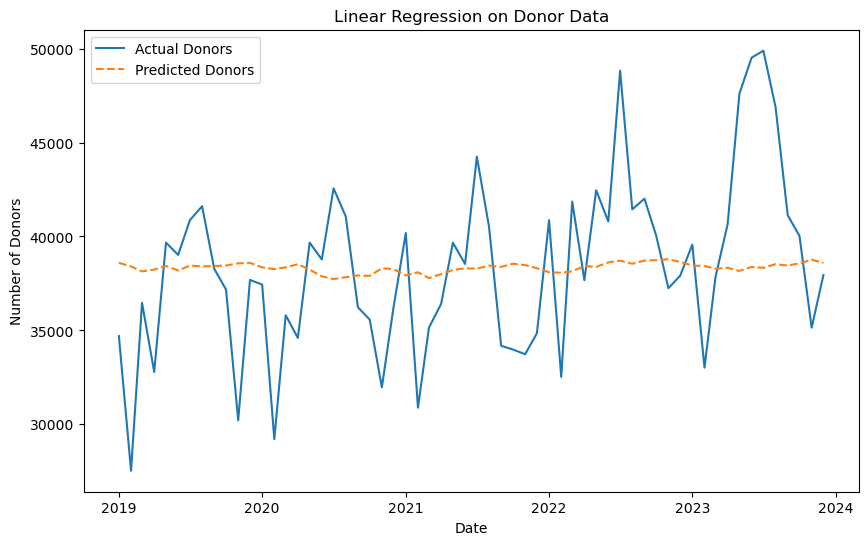

In [28]:
from sklearn.linear_model import LinearRegression

X_scaled = donors[['CPI']]
y = donors['AdjustedDonors']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Predict values
donors['Predicted Donors'] = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(donors.index, donors['AdjustedDonors'], label='Actual Donors')
plt.plot(donors.index, donors['Predicted Donors'], label='Predicted Donors', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Donors')
plt.title('Linear Regression on Donor Data')
plt.legend()
plt.show()